**Задание:** Найти   юбку

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

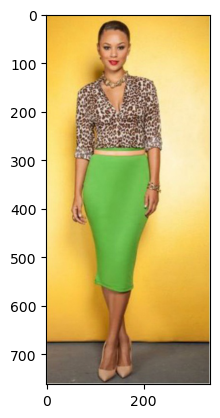

In [24]:
image = cv.imread('dress.jpg')
scale_percent = 100
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

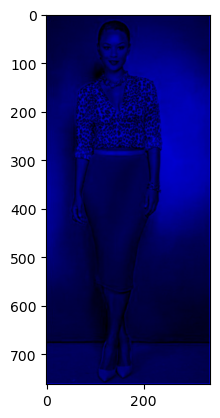

In [67]:
green = image_rgb.copy()
# set blue and green channels to 0
green[:, :, 0] = 0
green[:, :, 1] = 0
# RGB - Red
plt.imshow(green)
plt.show()

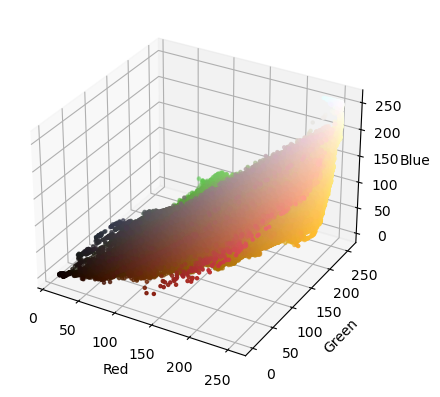

In [26]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [27]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

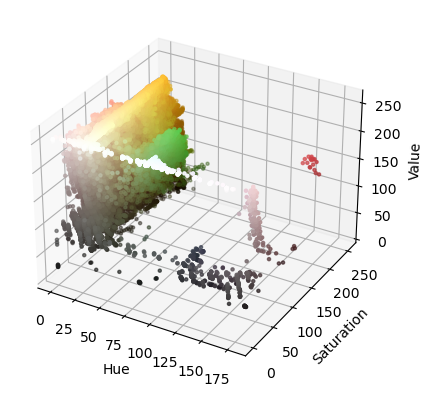

In [28]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

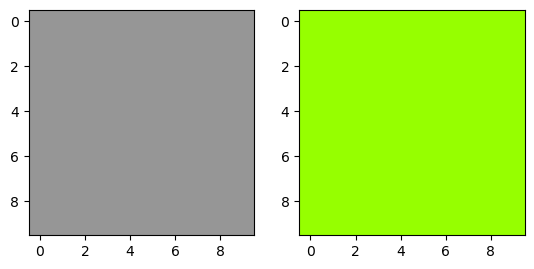

In [108]:
lower_blue = np.array([40,0,150])
upper_blue = np.array([60,255,255])
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

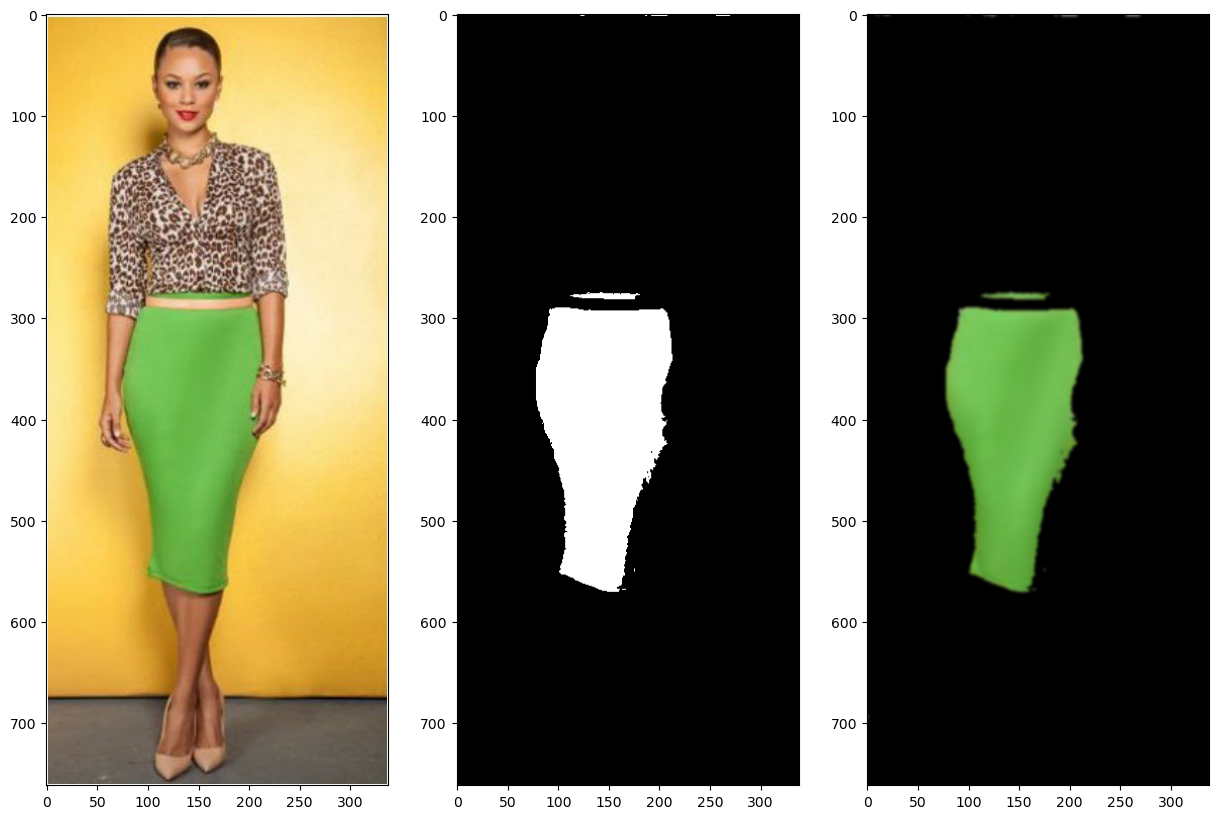

In [110]:
mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)
result = cv.GaussianBlur(result, (7, 7), 0)
plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

In [9]:
#low_yellow = [16, 0, 240]
#high_yellow = [25, 255, 255]